# Import required libraries


In [29]:
import pandas as pd
from datetime import date
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [30]:


START = "2018-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

### Loading the stock price data of apple incorporation

In [31]:
data = load_data('AAPL')
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615883,102223600
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608814,118071600
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797440,89738400
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261925,94640000
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108673,82271200


In [32]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,42.540001,43.075001,42.314999,43.064999,102223600
1,43.132500,43.637501,42.990002,43.057499,118071600
2,43.134998,43.367500,43.020000,43.257500,89738400
3,43.360001,43.842499,43.262501,43.750000,94640000
4,43.587502,43.902500,43.482498,43.587502,82271200


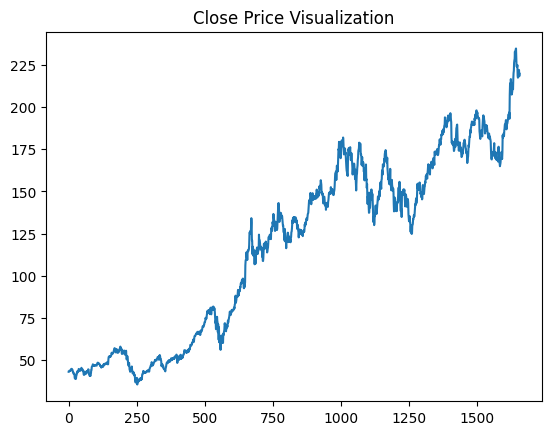

In [33]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [34]:
df

,Open,High,Low,Close,Volume
0,42.540001,43.075001,42.314999,43.064999,102223600
1,43.132500,43.637501,42.990002,43.057499,118071600
2,43.134998,43.367500,43.020000,43.257500,89738400
3,43.360001,43.842499,43.262501,43.750000,94640000
4,43.587502,43.902500,43.482498,43.587502,82271200
...,...,...,...,...,...
1652,216.960007,219.300003,215.750000,218.240005,36311800
1653,219.190002,220.330002,216.119995,218.800003,41643800
1654,221.440002,223.820007,220.630005,222.080002,50036300
1655,224.369995,224.479996,217.020004,218.360001,62501000


# Plotting moving averages of 100 day

---



In [35]:
ma100 = df.Close.rolling(100).mean()
ma100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

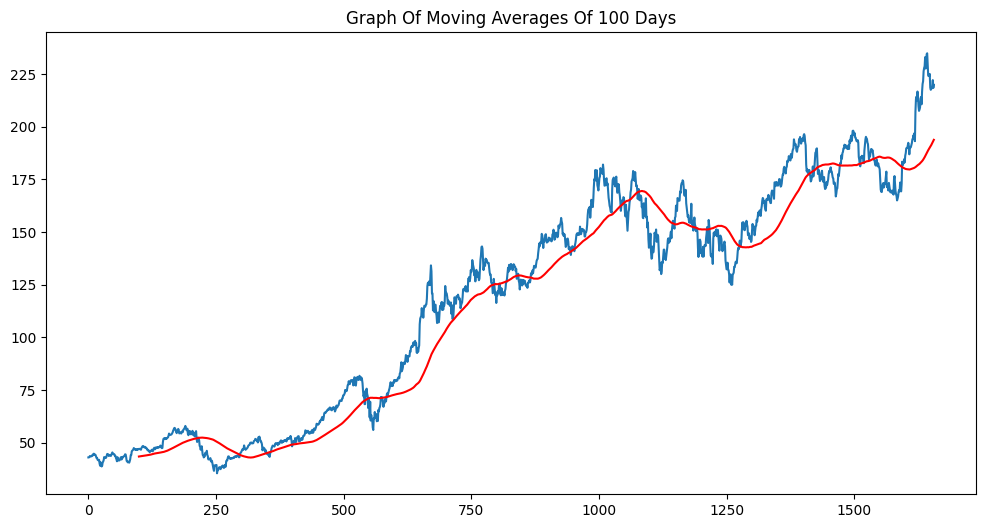

In [36]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [37]:
ma200 = df.Close.rolling(200).mean()
ma200

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

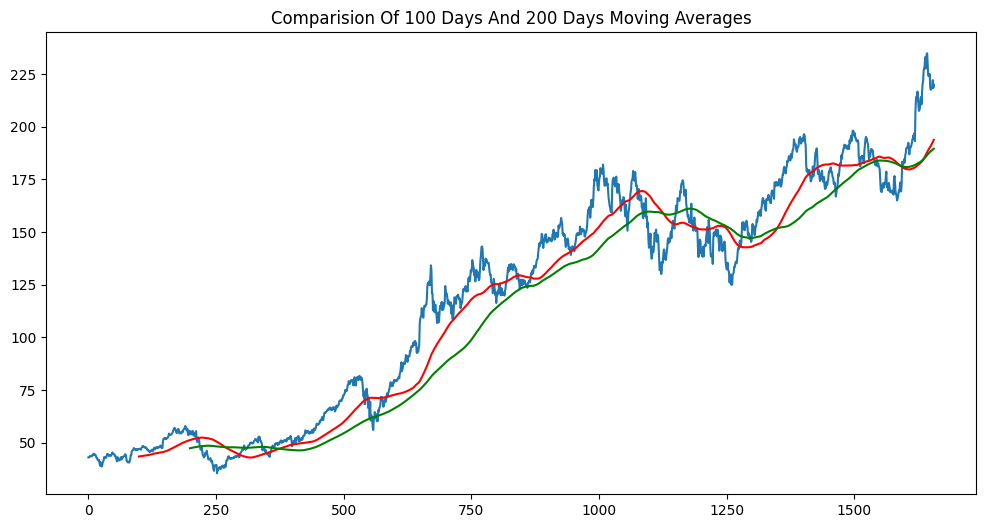

In [38]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [39]:
df.shape

(1657, 5)

# Spliting the dataset into 70% training set and 30% testing set

In [40]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1159, 7)
(498, 7)


In [41]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615883,102223600
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608814,118071600
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797440,89738400
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261925,94640000
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108673,82271200


In [42]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1159,2022-08-10,167.679993,169.339996,166.899994,169.240005,167.579163,70170500
1160,2022-08-11,170.059998,170.990005,168.190002,168.490005,166.836502,57149200
1161,2022-08-12,169.820007,172.169998,169.399994,172.100006,170.411087,68039400
1162,2022-08-15,171.520004,173.389999,171.350006,173.190002,171.490387,54091700
1163,2022-08-16,172.779999,173.710007,171.660004,173.029999,171.331940,56377100


# Using MinMax scaler for normalization of the dataset



In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [44]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [45]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.05132712],
       [0.05127591],
       [0.05264146],
       ...,
       [0.88625082],
       [0.88297346],
       [0.88331486]])

In [46]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [47]:
x_train.shape

(1059, 100, 1)

# ML Model (LSTM)

---



In [48]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [49]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [51]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train,epochs = 50)

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 18s 220ms/step - MAE: 0.2784 - loss: 0.1380
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - MAE: 0.0895 - loss: 0.0147
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - MAE: 0.0872 - loss: 0.0163
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - MAE: 0.0763 - loss: 0.0112
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - MAE: 0.0649 - loss: 0.0085
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - MAE: 0.0658 - loss: 0.0086
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - MAE: 0.0678 - loss: 0.0092
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - MAE: 0.0706 - loss: 0.0094
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - MAE: 0.0680 - loss: 0.0093
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - MAE: 0.0589 - loss: 0.0070
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - MAE: 0.0581 - loss: 0.0074
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - MAE: 0.0776 - loss: 0.0114
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━

In [52]:

test_close.shape
test_close

array([[169.24000549],
       [168.49000549],
       [172.1000061 ],
       [173.19000244],
       [173.02999878],
       [174.55000305],
       [174.1499939 ],
       [171.52000427],
       [167.57000732],
       [167.22999573],
       [167.52999878],
       [170.02999878],
       [163.61999512],
       [161.38000488],
       [158.91000366],
       [157.22000122],
       [157.96000671],
       [155.80999756],
       [154.52999878],
       [155.96000671],
       [154.46000671],
       [157.36999512],
       [163.42999268],
       [153.83999634],
       [155.30999756],
       [152.36999512],
       [150.69999695],
       [154.47999573],
       [156.8999939 ],
       [153.72000122],
       [152.74000549],
       [150.42999268],
       [150.77000427],
       [151.75999451],
       [149.83999634],
       [142.47999573],
       [138.19999695],
       [142.44999695],
       [146.1000061 ],
       [146.3999939 ],
       [145.42999268],
       [140.08999634],
       [140.41999817],
       [138

In [53]:
past_100_days = pd.DataFrame(train_close[-100:])

In [54]:
test_df = pd.DataFrame(test_close)

## Defining the final dataset for testing by including last 100 columns of the training dataset to get the prediction from the 1st column of the testing dataset.



In [56]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [57]:
final_df.head()

,0
0,160.619995
1,163.979996
2,165.380005
3,168.820007
4,170.210007


In [58]:
input_data = scaler.fit_transform(final_df)
input_data

array([[3.24225820e-01],
       [3.54826915e-01],
       [3.67577453e-01],
       [3.98907162e-01],
       [4.11566536e-01],
       [4.46721365e-01],
       [4.52641163e-01],
       [4.60655779e-01],
       [4.91256875e-01],
       [4.80418966e-01],
       [4.51639336e-01],
       [4.48907068e-01],
       [4.86520953e-01],
       [4.55737669e-01],
       [4.26320589e-01],
       [4.29143881e-01],
       [4.10473546e-01],
       [3.70947171e-01],
       [3.88342467e-01],
       [4.13296838e-01],
       [3.66757675e-01],
       [3.64754160e-01],
       [3.85974437e-01],
       [3.84426184e-01],
       [3.77049158e-01],
       [3.34881540e-01],
       [3.44808785e-01],
       [2.89435367e-01],
       [2.87340689e-01],
       [3.51730410e-01],
       [2.97176631e-01],
       [3.00000063e-01],
       [3.13843313e-01],
       [3.73406226e-01],
       [2.89162154e-01],
       [2.93806913e-01],
       [2.46265922e-01],
       [2.68579189e-01],
       [1.95628427e-01],
       [1.59744984e-01],


In [59]:
input_data.shape

(598, 1)

# Testing the model

---



In [60]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [61]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(498, 100, 1)
(498,)


## Making prediction and plotting the graph of predicted vs actual values


In [62]:
# Making predictions

y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step


In [63]:
y_pred.shape

(498, 1)

In [64]:
y_test

array([4.02732282e-01, 3.95901681e-01, 4.28779644e-01, 4.38706750e-01,
       4.37249522e-01, 4.51092911e-01, 4.47449840e-01, 4.23497296e-01,
       3.87522828e-01, 3.84426184e-01, 3.87158452e-01, 4.09927120e-01,
       3.51548221e-01, 3.31147584e-01, 3.08652129e-01, 2.93260487e-01,
       3.00000063e-01, 2.80418925e-01, 2.68761378e-01, 2.81785128e-01,
       2.68123927e-01, 2.94626551e-01, 3.49817780e-01, 2.62477203e-01,
       2.75865191e-01, 2.49089215e-01, 2.33879761e-01, 2.68305976e-01,
       2.90346031e-01, 2.61384351e-01, 2.52459072e-01, 2.31420706e-01,
       2.34517351e-01, 2.43533654e-01, 2.26047334e-01, 1.59016370e-01,
       1.20036421e-01, 1.58743157e-01, 1.91985496e-01, 1.94717625e-01,
       1.85883370e-01, 1.37249528e-01, 1.40255009e-01, 1.27140234e-01,
       1.21311461e-01, 1.63661267e-01, 1.21675837e-01, 1.58378919e-01,
       1.70582892e-01, 1.71584719e-01, 1.67304198e-01, 2.02641216e-01,
       2.22495427e-01, 2.48816002e-01, 2.21584764e-01, 1.80145760e-01,
      

In [65]:
y_pred

array([[0.31341276],
       [0.32551292],
       [0.33694416],
       [0.34773964],
       [0.35806102],
       [0.36797675],
       [0.37758428],
       [0.38687652],
       [0.39560452],
       [0.40323955],
       [0.40934283],
       [0.413735  ],
       [0.41655314],
       [0.41781974],
       [0.417534  ],
       [0.41538957],
       [0.410859  ],
       [0.4037426 ],
       [0.39406037],
       [0.3819713 ],
       [0.36784345],
       [0.35216874],
       [0.33568645],
       [0.31928885],
       [0.3036717 ],
       [0.28925204],
       [0.27615482],
       [0.26452374],
       [0.25451446],
       [0.24622115],
       [0.23957814],
       [0.23445502],
       [0.23059782],
       [0.22770561],
       [0.22552806],
       [0.22386369],
       [0.2223713 ],
       [0.2208133 ],
       [0.21904229],
       [0.21699223],
       [0.2146225 ],
       [0.21200433],
       [0.20906983],
       [0.20566833],
       [0.20153059],
       [0.1964306 ],
       [0.19038138],
       [0.183

In [66]:
scaler.scale_

array([0.00910747])

In [67]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

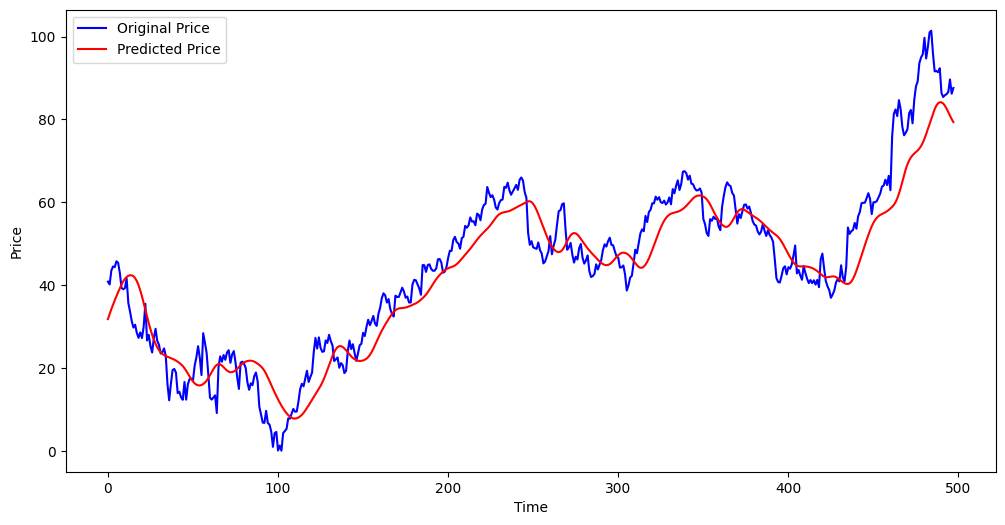

In [68]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Model evaluation

In [69]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  5.750745679340926
